In [2]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/asfox/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import re
import robobrowser
from bs4 import BeautifulSoup

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
URL = 'http://www.imsdb.com/scripts/Hot-Tub-Time-Machine.html'


Load in your web-page... 

(you may need to do this differently in python3... I *think* uncommenting the below will work) 

In [11]:
browser = robobrowser.RoboBrowser(history = True)

browser.open(URL)
htmltext = browser.select('body')
paragraphs = []
for x in htmltext:
    paragraphs.append(str(x))
htmltext=''.join(paragraphs)

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [12]:
raw = BeautifulSoup(htmltext, "lxml").get_text()

Use NLTK.

In [14]:
tokens = nltk.word_tokenize(raw)
print (nltk.pos_tag( tokens ))


[('The', 'DT'), ('Internet', 'NNP'), ('Movie', 'NNP'), ('Script', 'NNP'), ('Database', 'NNP'), ('(', '('), ('IMSDb', 'NNP'), (')', ')'), ('The', 'DT'), ('web', 'NN'), ("'s", 'POS'), ('largest', 'JJS'), ('movie', 'NN'), ('script', 'NN'), ('resource', 'NN'), ('!', '.'), ('Search', 'NNP'), ('IMSDb', 'NNP'), ('Alphabetical', 'NNP'), ('#', '#'), ('A', 'NNP'), ('B', 'NNP'), ('C', 'NNP'), ('D', 'NNP'), ('E', 'NNP'), ('F', 'NNP'), ('G', 'NNP'), ('H', 'NNP'), ('I', 'PRP'), ('J', 'NNP'), ('K', 'NNP'), ('L', 'NNP'), ('M', 'NNP'), ('N', 'NNP'), ('O', 'NNP'), ('P', 'NNP'), ('Q', 'NNP'), ('R', 'NNP'), ('S', 'NNP'), ('T', 'NNP'), ('U', 'NNP'), ('V', 'NNP'), ('W', 'NNP'), ('X', 'NNP'), ('Y', 'NNP'), ('Z', 'NNP'), ('Genre', 'NNP'), ('Action', 'NNP'), ('Adventure', 'NNP'), ('Animation', 'NNP'), ('Comedy', 'NNP'), ('Crime', 'NNP'), ('Drama', 'NNP'), ('Family', 'NNP'), ('Fantasy', 'NNP'), ('Film-Noir', 'NNP'), ('Horror', 'NNP'), ('Musical', 'NNP'), ('Mystery', 'NNP'), ('Romance', 'NNP'), ('Sci-Fi', 'NNP')

In [17]:
# tokens to Text
text = nltk.Text(tokens)
print( text.concordance('hot') )

# concordance



Displaying 25 of 46 matches:
Movie Chat Message Yell ! ALL SCRIPTS HOT TUB TIME MACHINE Written by Josh Heal
UB TIME MACHINE Written by Josh Heald Hot Tub Time Machine Theme Lyrics by Josh
 you ever seen When I 'm soakin in my Hot Tub Time Machine When you 're going b
real mean When you 're soakin in your Hot Tub Time Machine Yeah ! Hot Tub - Tim
n in your Hot Tub Time Machine Yeah ! Hot Tub - Time Machine ! Hot Tub - Time M
chine Yeah ! Hot Tub - Time Machine ! Hot Tub - Time Machine ! C'mon ! ( Sweet 
t ta be lean When you roll up in your Hot Tub Time Machine Yeah your shirt 's a
er me your dean In the college of the Hot Tub Time Machine Yeah ! Hot Tub - Tim
ge of the Hot Tub Time Machine Yeah ! Hot Tub - Time Machine ! Hot Tub - Time M
chine Yeah ! Hot Tub - Time Machine ! Hot Tub - Time Machine ! Yeah ! FADE IN :
NY DAY . CAMERA PANS DOWN to reveal A HOT TUB FULL OF HOT CHICKS IN BIKINIS . T
PANS DOWN to reveal A HOT TUB FULL OF HOT CHICKS IN BIKINIS . They splash about
. Then -- A

In [ ]:
text = nltk.Text(tokens)
print text.concordance("hot")

### Get just the screenplay...

(Stolen from our webscraping class.)

In [14]:
# pattern = re.compile(r'\<b\>\W+(?P<character>[A-Z]+)(?P<stage>\W\(.*\))*\W+\<\/b\>\W+(?P<line>[\w\W]+?)(?=\<b\>)')
pattern = re.compile(r'\<td class="scrtext"\>\W*\<pre\>\W*(?P<screenplay>[\w\W]*)(?=\<\/pre\>)')

match_list = []
match_iterator = pattern.finditer(htmltext)
for match in match_iterator:
#     print match
    match_list.append( match.groupdict() )

screenplay = match_list[0]['screenplay']
# print screenplay

In [15]:
raw = BeautifulSoup(screenplay, "lxml").get_text()

Repeat our concordance code. 

In [17]:
tokens = nltk.word_tokenize(raw)
text = nltk.Text(tokens)
print text.concordance("hot")

Displaying 25 of 45 matches:
                                      HOT TUB TIME MACHINE Written by Josh Heal
                                      Hot Tub Time Machine Theme Lyrics by Josh
 you ever seen When I 'm soakin in my Hot Tub Time Machine When you 're going b
real mean When you 're soakin in your Hot Tub Time Machine Yeah ! Hot Tub - Tim
n in your Hot Tub Time Machine Yeah ! Hot Tub - Time Machine ! Hot Tub - Time M
chine Yeah ! Hot Tub - Time Machine ! Hot Tub - Time Machine ! C'mon ! ( Sweet 
t ta be lean When you roll up in your Hot Tub Time Machine Yeah your shirt 's a
er me your dean In the college of the Hot Tub Time Machine Yeah ! Hot Tub - Tim
ge of the Hot Tub Time Machine Yeah ! Hot Tub - Time Machine ! Hot Tub - Time M
chine Yeah ! Hot Tub - Time Machine ! Hot Tub - Time Machine ! Yeah ! FADE IN :
NY DAY . CAMERA PANS DOWN to reveal A HOT TUB FULL OF HOT CHICKS IN BIKINIS . T
PANS DOWN to reveal A HOT TUB FULL OF HOT CHICKS IN BIKINIS . They splash about
. Then -- A

In [29]:
counts = nltk.FreqDist(tokens)
print( counts.most_common(10) )

[('the', 656), ('a', 456), ('and', 412), ('to', 334), ('I', 297), ('ADAM', 286), ('you', 247), ('Adam', 225), ('of', 219), ('LOU', 219)]


Import stopwords and punctuation from NLTK

In [25]:
nltk.download("stopwords")
from string import punctuation
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/asfox/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
filtered_for_punctuation = raw
for punc in punctuation:
    filtered_for_punctuation = filtered_for_punctuation.replace(punc, "")

tokens = nltk.wordpunct_tokenize(filtered_for_punctuation)

filtered_words = [word for word in tokens if word.lower() not in stopwords.words('english')]


In [28]:
counts = nltk.FreqDist(filtered_words)
counts.most_common(10)

[('ADAM', 286),
 ('Adam', 225),
 ('LOU', 219),
 ('NICK', 155),
 ('Lou', 137),
 ('JACOB', 104),
 ('Im', 103),
 ('Nick', 100),
 ('Jacob', 97),
 ('CONTD', 91)]

In [31]:
print( "They use the word HOT "+str(counts['hot'])+" times" )

They use the word HOT 20 times


### Remove all stage directions.

(Also stolen from our webscraping FAQ class.)

In [32]:
# remember this? 
# pattern = re.compile(r'\<b\>\W+(?P<character>[A-Z]+)(?P<stage>\W\(.*\))*\W+\<\/b\>\W+(?P<line>[\w\W]+?)(?=\<b\>)')

# <b> ADAM (SHOUTS) </b> fjdklsfjdkslfjdsklfsdj. <b> STEVE </b>

pattern = re.compile(r'\<b\>\W+(?P<character>[A-Z]+)(?P<stage>\W\(.*\))*\W+\<\/b\>\W+(?P<line>[\w\W]+?)(?=\<b\>)')

match_list = []
match_iterator = pattern.finditer(htmltext)
for match in match_iterator:
    match_list.append( match.groupdict() )

df = pd.DataFrame(match_list)
df.loc[ [x==None for x in df['stage'].values],'stage'] = ''

df['line'] = [ re.sub('\s+',' ', line) for line in df['line']]

# get rid of some extra stage directions
df['line'] =[ re.sub(r'\<*\/*b\>*\W*\(.*\)\W\<*\/*b\>*', '', line) for line in df['line']]



In [34]:
print( df.head() )

  character                                               line    stage
0      LILY  Ready for the wildest bachelor party of all ti...   (O.S.)
1      ADAM  You know it. I'm gonna bang all sorts of chick...         
2      LILY          That's not the answer I was looking for.          
3      ADAM  Sorry, honey. Adam gives his beautiful fiancee...         
4      LILY                              Look what I found...          


In [37]:
# get rid of newlines
raw_lines = '\n'.join( df['line'] )


In [ ]:
print raw_lines[-1000:]

In [38]:
filtered_for_punctuation = raw_lines
for punc in punctuation:
    filtered_for_punctuation = filtered_for_punctuation.replace(punc, "")

tokens = nltk.wordpunct_tokenize(filtered_for_punctuation)

filtered_words = [word for word in tokens if word.lower() not in stopwords.words('english')]


In [39]:
counts = nltk.FreqDist(filtered_words)
counts.most_common(10)

[('Adam', 146),
 ('Im', 96),
 ('Lou', 88),
 ('looks', 64),
 ('like', 56),
 ('Jacob', 54),
 ('Nick', 53),
 ('gonna', 52),
 ('know', 51),
 ('get', 48)]

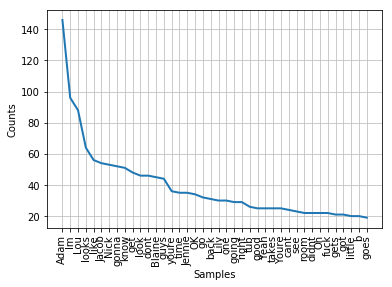

In [40]:
counts.plot(40)

## TextBlob!

![sloria](https://cdn.cos.io/media/images/loria.original.jpg)

In [42]:
from textblob import TextBlob
from nltk.tokenize import LineTokenizer

In [44]:
blob = TextBlob(raw_lines)
blob.tokenize()

WordList(['Ready', 'for', 'the', 'wildest', 'bachelor', 'party', 'of', 'all', 'time', '?', 'LILY', '(', 'early', '30s', ',', 'shirt', 'and', 'jeans', ',', 'hot', 'in', 'a', 'smart', 'and', 'classy', 'sense', ')', 'walks', 'in', 'the', 'room', ',', 'smiling', '.', 'You', 'know', 'it', '.', 'I', "'m", 'gon', 'na', 'bang', 'all', 'sorts', 'of', 'chicks', 'this', 'weekend', '!', 'That', "'s", 'not', 'the', 'answer', 'I', 'was', 'looking', 'for', '.', 'Sorry', ',', 'honey', '.', 'Adam', 'gives', 'his', 'beautiful', 'fiancee', 'a', 'playful', 'kiss', '.', 'She', 'shows', 'him', 'some', 'PHOTOS', '.', 'Look', 'what', 'I', 'found', '...', 'Check', 'out', 'that', 'young', 'stud', '.', 'Can', 'you', 'believe', 'he', "'s", 'about', 'to', 'get', 'married', '?', 'Lily', 'and', 'Adam', 'look', 'through', 'more', 'PHOTOS', 'of', 'a', 'YOUNG', 'ADAM', '(', '17', ')', 'partying', 'at', 'a', 'SKI', 'RESORT', 'with', 'his', 'FRIENDS', ':', '--', 'In', 'full', '80s', 'SKI', 'GEAR', 'on', 'a', 'mountain', 

In [46]:
blob = TextBlob(raw_lines)
tokenizer = LineTokenizer()
lines = blob.tokenize(tokenizer)

print( lines[0] )

Ready for the wildest bachelor party of all time? LILY (early 30s, shirt and jeans, hot in a smart and classy sense) walks in the room, smiling. 


parts of language

In [47]:
nltk.download('averaged_perceptron_tagger')
from textblob.taggers import NLTKTagger

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/asfox/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [48]:
blob = TextBlob(raw_lines)
blob.pos_tags

[('Ready', 'JJ'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('wildest', 'JJS'),
 ('bachelor', 'NN'),
 ('party', 'NN'),
 ('of', 'IN'),
 ('all', 'DT'),
 ('time', 'NN'),
 ('LILY', 'NNP'),
 ('early', 'JJ'),
 ('30s', 'CD'),
 ('shirt', 'NN'),
 ('and', 'CC'),
 ('jeans', 'NNS'),
 ('hot', 'JJ'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('smart', 'JJ'),
 ('and', 'CC'),
 ('classy', 'JJ'),
 ('sense', 'NN'),
 ('walks', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('room', 'NN'),
 ('smiling', 'VBG'),
 ('You', 'PRP'),
 ('know', 'VBP'),
 ('it', 'PRP'),
 ('I', 'PRP'),
 ("'m", 'VBP'),
 ('gon', 'VBG'),
 ('na', 'TO'),
 ('bang', 'VB'),
 ('all', 'DT'),
 ('sorts', 'NNS'),
 ('of', 'IN'),
 ('chicks', 'NNS'),
 ('this', 'DT'),
 ('weekend', 'NN'),
 ('That', 'DT'),
 ("'s", 'VBZ'),
 ('not', 'RB'),
 ('the', 'DT'),
 ('answer', 'NN'),
 ('I', 'PRP'),
 ('was', 'VBD'),
 ('looking', 'VBG'),
 ('for', 'IN'),
 ('Sorry', 'NNP'),
 ('honey', 'NN'),
 ('Adam', 'NNP'),
 ('gives', 'VBZ'),
 ('his', 'PRP$'),
 ('beautiful', 'JJ'),
 ('fiancee', 'NN'),
 ('a', '

In [50]:
nltk_tagger = NLTKTagger()
b = TextBlob(lines[0], pos_tagger=nltk_tagger)
print( b.pos_tags )

[('Ready', 'JJ'), ('for', 'IN'), ('the', 'DT'), ('wildest', 'JJS'), ('bachelor', 'NN'), ('party', 'NN'), ('of', 'IN'), ('all', 'DT'), ('time', 'NN'), ('LILY', 'NNP'), ('early', 'JJ'), ('30s', 'CD'), ('shirt', 'NN'), ('and', 'CC'), ('jeans', 'NNS'), ('hot', 'JJ'), ('in', 'IN'), ('a', 'DT'), ('smart', 'JJ'), ('and', 'CC'), ('classy', 'JJ'), ('sense', 'NN'), ('walks', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('room', 'NN'), ('smiling', 'VBG')]


## Sentiment Analysis

In [53]:
for i in df.iterrows():
    print (i)
    break

(0, character                                                 LILY
line         Ready for the wildest bachelor party of all ti...
stage                                                   (O.S.)
Name: 0, dtype: object)


In [56]:
# create columns to populate

df['polarity'] = 0
df['subjectivity'] = 0

for data in df.iterrows():
    this_df = data[1]
    index = data[0]
    blob = TextBlob( this_df['line'] )
    p, s = blob.sentiment
    df.loc[index,'polarity'] = p
    df.loc[index,'subjectivity']=s

# loop over df rows, create blob and get sentiment 



In [58]:
print(df.head())

  character                                               line    stage  \
0      LILY  Ready for the wildest bachelor party of all ti...   (O.S.)   
1      ADAM  You know it. I'm gonna bang all sorts of chick...            
2      LILY          That's not the answer I was looking for.             
3      ADAM  Sorry, honey. Adam gives his beautiful fiancee...            
4      LILY                              Look what I found...             

   polarity  subjectivity  
0  0.172857      0.638571  
1  0.000000      0.000000  
2  0.000000      0.000000  
3  0.175000      1.000000  
4  0.000000      0.000000  


(array([  8.,  14.,  44.,  58.,  97., 105.,  98.,  52.,  11.,  26.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

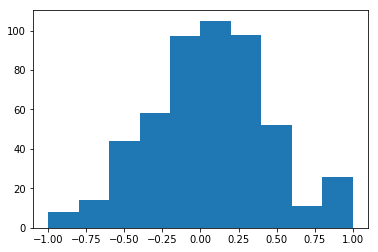

In [61]:
# histogram
plt.hist(df['polarity'][df['polarity'] != 0 ])


In [63]:
# print most positive and most negative lines
print (df['line'][df['polarity'] < -.9 ].values)



["Oh, Adam's stupid brother's coming? Boo! Drive away before he gets in the car! "
 'Oh man. The Brew Haus is a PF Chang\'s. Lou notices a TGI Friday\'s, with a sign advertising a "Hannah Montana 3-D Experience!" He looks utterly disgusted. '
 ' Truth. Lou throws up his hands in frustration. He looks miserable, as Michelle confers with him. '
 'Brothers. They EMBRACE. Lou looks disgusted. '
 'You could say that. You could also say it gave me horrible diarrhea. '
 'She saw me at my worst and she stayed. Lily holds the bucket, as Adam pukes into it. '
 'This is disgusting. ' 'A horrible mistake. ']


In [64]:
df['polarity'] = 0
df['subjectivity'] = 0

for i, row in df.iterrows():
    this_blob = TextBlob(row['line'])
    df.loc[i,'polarity'], df.loc[i,'subjectivity'] = this_blob.sentiment


In [ ]:
plt.hist(df['polarity'][df['polarity'] <> 0]);

In [63]:
print '\n---positive---'
print df[['character','line']][df['polarity'] >= .9 ].values

print '\n---negative---'
print df[['character','line']][df['polarity'] <= -.9 ].values


---positive---
[['ADAM' 'You kidding me? It would be fucking incredible. ']
 ['NICK' 'This trip represents everything awesome about being a dude. ']
 ['NICK'
  'Gentlemen... in this room lies the beginning of our awesome weekend. ']
 ['LOU' 'Oh my god. The water is perfect. ']
 ['CHAZ'
  " You're welcome any time though! Adam picks up his BACKPACK, which fell off during the collision. He stares at Jennie again and smiles. "]
 ['TAD'
  "There's some people I want you to meet. By the way, bodacious hair. Incredibly chic. "]
 ['LOU'
  "Sandy, I don't know what you did with this wine, but it is delightful. "]
 ['ADAM'
  "I'm not supposed to do this. But I'm gonna upgrade you to Marvin Gardens. It's a suite. Plus, there's an excellent buffet and a view of the pool. Jennie laughs, despite herself. She looks around, as if someone might see her. Adam notices. "]
 ['NICK' "Makes perfect sense, man. Lou squeezes Jacob's shoulder. "]
 ['LOU' "See? I'm awesome here. You shoulda stayed out of that

Get characters

In [65]:
# use grouby becuase otherwise it may reorder... 
char_list = df.groupby('character')['character'].count().index
my_chars = char_list[ df.groupby('character')['character'].count() > 20 ]


In [66]:
df_chars = df.ix[ [this_char in my_chars for this_char in df['character']] ]

In [68]:
print (df_chars)

    character                                               line      stage  \
0        LILY  Ready for the wildest bachelor party of all ti...     (O.S.)   
1        ADAM  You know it. I'm gonna bang all sorts of chick...              
2        LILY          That's not the answer I was looking for.               
3        ADAM  Sorry, honey. Adam gives his beautiful fiancee...              
4        LILY                              Look what I found...               
5        ADAM  Check out that young stud. Can you believe he'...              
6        ADAM                Ignore that one. Nothing happened.    (CONT'D)   
8        LILY  Adam, you didn't know me yet. As Adam goes bac...              
9        LILY  Who's this? Lily shows Adam a PHOTO: -- A SMOK...   (CONT'D)   
10       ADAM                                     I'm not sure.               
11       LILY  Really? Lily shows Adam another PHOTO: -- YOUN...              
12       ADAM                                       

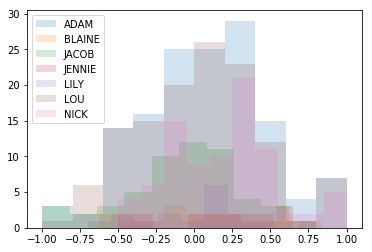

In [70]:
for char, df_lines in df_chars.groupby('character'):
    plt.hist(df_lines['polarity'][df_lines['polarity']!=0], label=char, alpha=.2)
plt.legend()

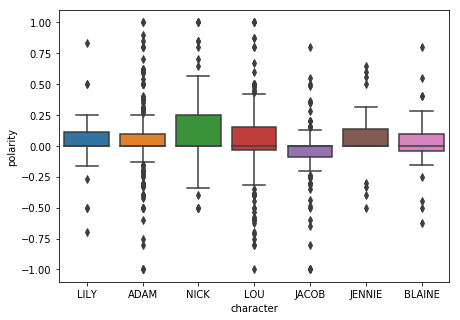

In [71]:
f, ax = plt.subplots(1,1,figsize=(7,5))
ax = sns.boxplot(x="character", y="polarity", data=df_chars)

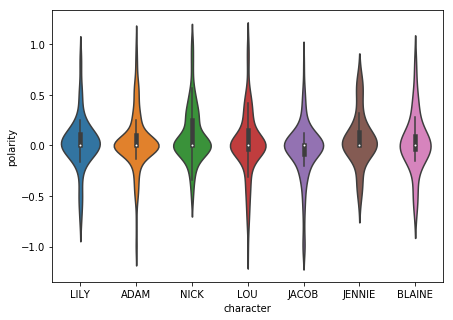

In [72]:
f, ax = plt.subplots(1,1,figsize=(7,5))
sns.violinplot(x="character", y="polarity", data=df_chars)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


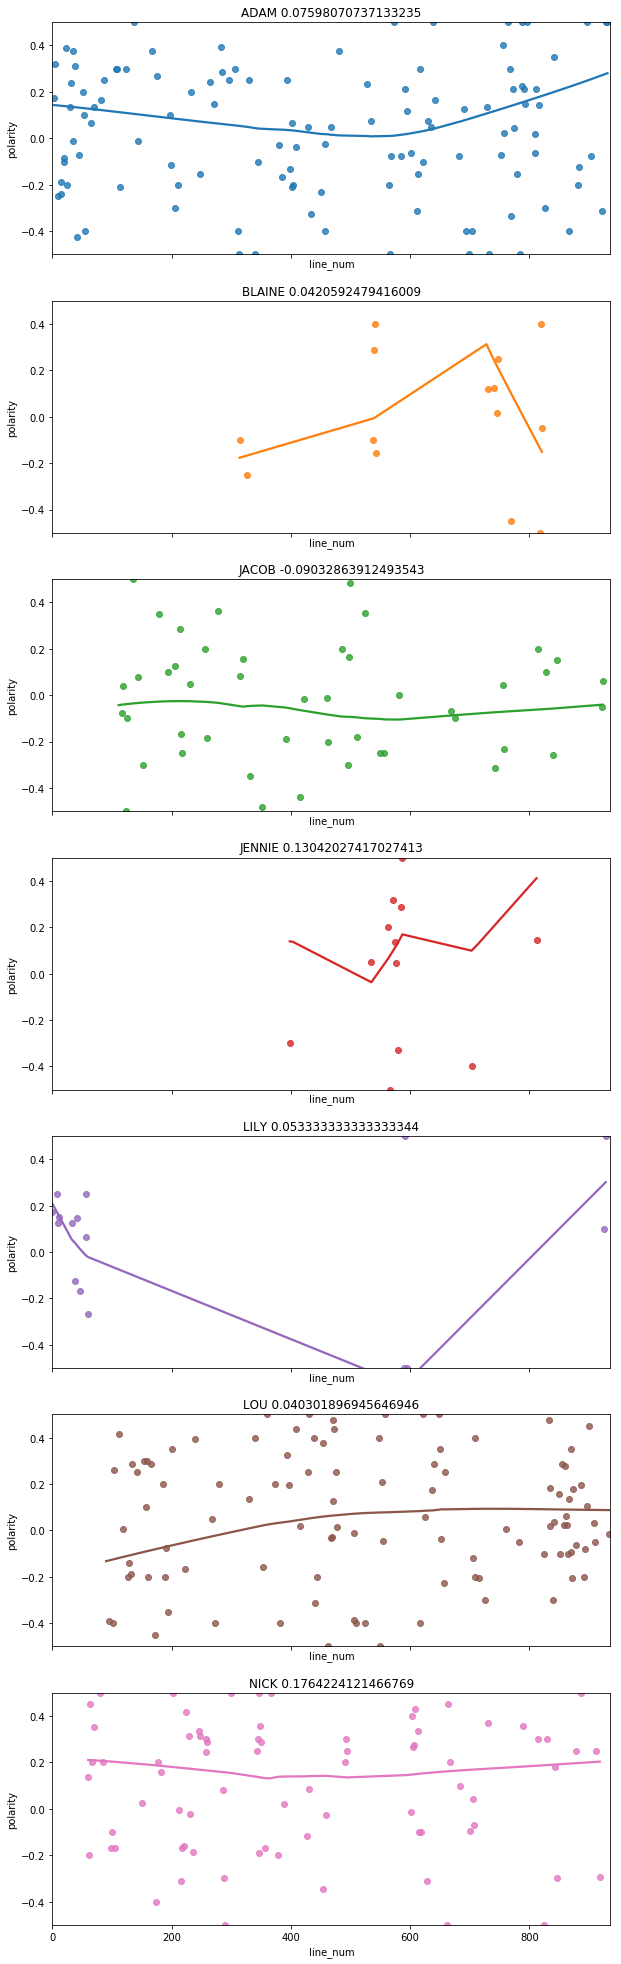

In [74]:
f, axarr = plt.subplots(len(my_chars),1, figsize=(10,5*len(my_chars)), sharex=True, sharey=True)

for i, char in enumerate(my_chars):
    this_df = df_chars.ix[ df['character'] == char ]
    this_df = this_df.ix[this_df['polarity'] != 0]
    this_df['line_num'] = this_df.index
    axarr[i].set_title(char+' '+str(np.mean(this_df['polarity'])))
    sns.regplot('line_num', 'polarity',this_df, lowess=True, ax=axarr[i] )
    axarr[i].set_xlim(0,max(df.index))
    axarr[i].set_ylim(-.5,.5)


In [75]:
df.head()

,character,line,stage,polarity,subjectivity
0,LILY,Ready for the wildest bachelor party of all ti...,(O.S.),0.172857,0.638571
1,ADAM,You know it. I'm gonna bang all sorts of chick...,,0.000000,0.000000
2,LILY,That's not the answer I was looking for.,,0.000000,0.000000
3,ADAM,"Sorry, honey. Adam gives his beautiful fiancee...",,0.175000,1.000000
4,LILY,Look what I found...,,0.000000,0.000000


### Make it into a class

In [91]:
from textblob import TextBlob
from statsmodels.nonparametric import smoothers_lowess
import itertools


class sentiment_script:
    def __init__(self,URL):
        self.URL = URL
        self.load_html()
        self.create_df()
        self.sentiment_analysis()

        self.my_chars = self.get_chars()

    def load_html( self ):
        browser = robobrowser.RoboBrowser(history = True)

        browser.open(URL)
        htmltext = browser.select('body')
        paragraphs = []
        for x in htmltext:
            paragraphs.append(str(x))
        htmltext=''.join(paragraphs)
        
        # For python 2... 
        #         chrome = mechanize.Browser()
        #         chrome.set_handle_robots(False)
        #         chrome.addheaders = [('User-agent', 
        #         'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36')]
        #         htmltext = chrome.open(self.URL).read()

        #         # make sure non-unicode characters are excluded... :-(
        #         htmltext = htmltext.decode('utf-8','ignore').encode("utf-8")

        self.htmltext = htmltext

    def create_df(self):
        pattern = re.compile(r'\<b\>\W+(?P<character>[A-Z]+)(?P<stage>\W\(.*\))*\W+\<\/b\>\W+(?P<line>[\w\W]+?)(?=\<b\>)')

        match_list = []
        match_iterator = pattern.finditer(self.htmltext)
        for match in match_iterator:
            match_list.append( match.groupdict() )

        df = pd.DataFrame(match_list)
        df.loc[ [x==None for x in df['stage'].values],'stage'] = ''

        df['line'] = [ re.sub('\s+',' ', line) for line in df['line']]

        # get rid of some extra stage directions
        df['line'] =[ re.sub(r'\<*\/*b\>*\W*\(.*\)\W\<*\/*b\>*', '', line) for line in df['line']]
        
        self.df = df

    def sentiment_analysis(self):
        df = self.df
        df['polarity'] = 0
        df['subjectivity'] = 0
        for i, row in df.iterrows():
            this_blob = TextBlob(row['line'])
            df.loc[i,'polarity'], df.loc[i,'subjectivity'] = this_blob.sentiment
        self.df = df
        

    def get_chars( self, num_lines=60 ):
        char_list = self.df.groupby('character')['character'].count().index
        self.my_chars = char_list[ self.df.groupby('character')['character'].count() > num_lines ]
        
        return self.my_chars

    def print_top_bottom_lines(self, threshold=.9):
        print('\n---positive---')
        print( self.df[['character','line']][self.df['polarity'] >= threshold ].values)

        print( '\n---negative---' )
        print( self.df[['character','line']][self.df['polarity'] <= -1*threshold ].values)

    def plot_chars_violin(self, my_chars=None):
        if not my_chars:
            my_chars = self.my_chars

        df_chars = self.df.ix[ [this_char in my_chars for this_char in self.df['character']] ]
        
        f, ax = plt.subplots(1,1,figsize=(7,5))
        ax = sns.violinplot(x="character", y="polarity", data=df_chars)
        return f, ax
        
        
    def plot_smooth_y(self, x, y):
        xy = smoothers_lowess.lowess(y, x, frac=0.33, it=3, delta=4.0, is_sorted=True, missing='drop', return_sorted=True)
        return(xy[:,0],xy[:,1])


    def plot_chars_by_time(self, my_chars=None, num_lines=None ):
        if num_lines:
            self.get_chars( num_lines=num_lines )
        if not my_chars:
            my_chars = self.my_chars
        
        df_chars = self.df.loc[ [this_char in my_chars for this_char in self.df['character']] ]
                    
        
        f, axarr = plt.subplots(len(my_chars),1, figsize=(10,5*len(my_chars)), sharex=True, sharey=True)        
        palette = itertools.cycle(sns.color_palette("husl",len(my_chars)))

        for i, char in enumerate(my_chars):
            this_df = df_chars.loc[ self.df['character'] == char ]
            this_df = this_df.loc[this_df['polarity'] != 0]
            this_df['line_num'] = this_df.index
            axarr[i].set_title(char+' '+str(np.mean(this_df['polarity'])))
            
            x,y = self.plot_smooth_y(this_df['line_num'], this_df['polarity'])
            axarr[i].plot(x,y, color=next(palette))            
            
#             sns.regplot('line_num', 'polarity',this_df, lowess=True, ax=axarr[i], scatter_kws={"s":0} )
            axarr[i].set_xlim(0,max(self.df.index))
#             axarr[i].set_ylim(-.5,.5)
        return f, axarr
    
    
    

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))



---positive---
[['ANDY' 'Oh, this looks GREAT, Mom! ']
 ['WOODY'
  'whispering) Just gather everyone up for a staff meeting and be happy!! ']
 ['HAMM' 'Oh, impressive wingspan. Very good! ']
 ['WOODY' "Oh, what?!...What?! These are plastic. He can't fly! "]
 ['WOODY'
  "Ok! Come on! You want a piece of me?! Buzz lands a punch that sends Woody's head spinning around. Woody lunges with all his might. He smacks Buzz in the face, making it SQUEAK with every blow. Buzz closes his helmet on Woody's hand. "]
 ['WOODY'
  "This is the perfect time to panic! I'm lost, Andy is gone, they're going to move from their house in two days and it's all your fault!! "]
 ['BUZZ' 'Great idea, Woody! I like your thinking! ']
 ['WOODY' "You are a toy! You can't fly! Buzz bows his head, defeated. "]
 ['WOODY' 'Good going, Slink! Now, just, just tie it on to something! ']
 ['WOODY'
  "No, it is. Look, over in that house is a kid who thinks you are the greatest, and it's not because you're a Space Ranger, pal,

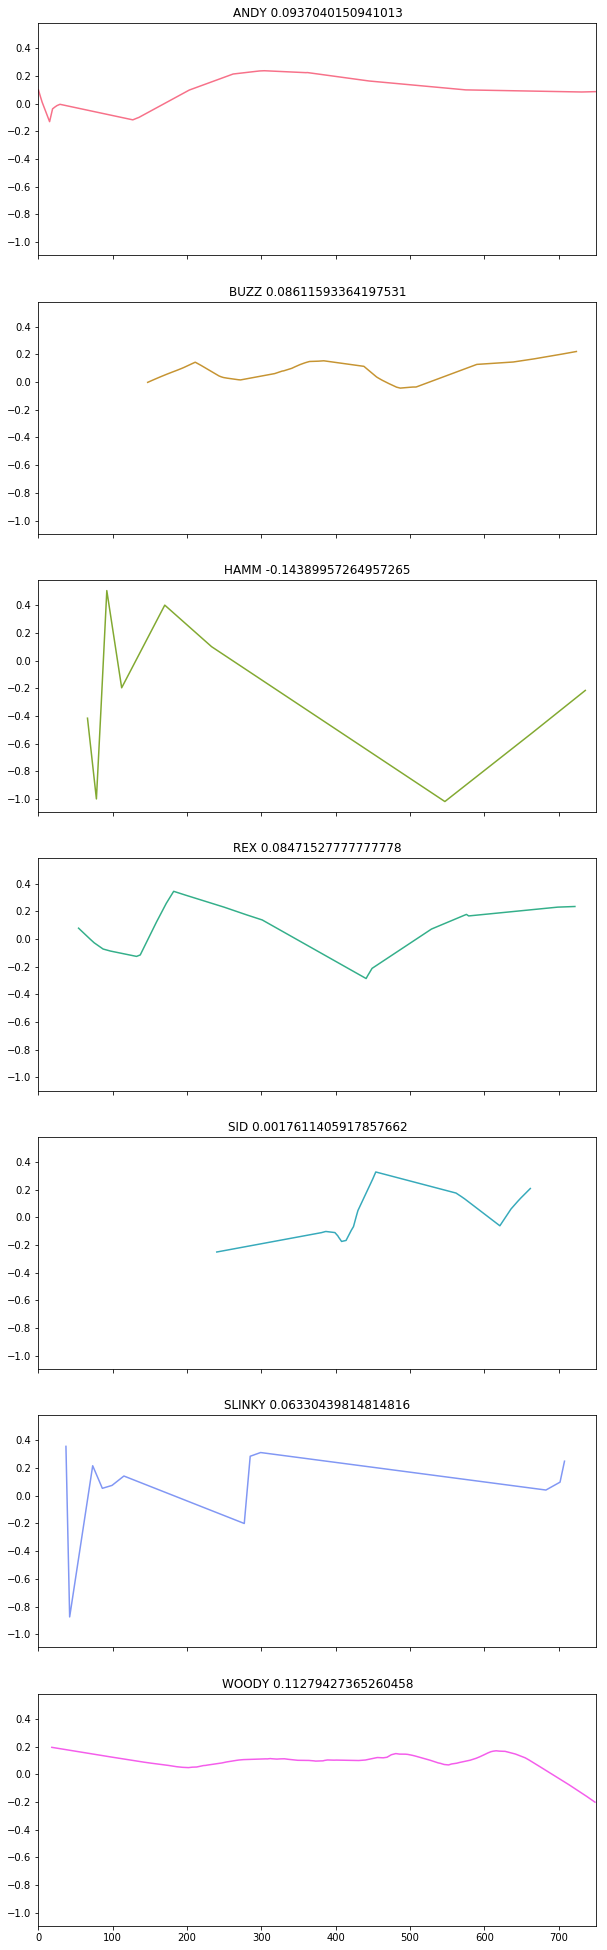

In [97]:


URL = 'http://www.imsdb.com/scripts/Toy-Story.html'
# URL = 'http://www.imsdb.com/scripts/Ghostbusters.html'
# URL = 'http://www.imsdb.com/scripts/Ghostbusters-2.html'
# URL = 'http://www.imsdb.com/scripts/Jurassic-Park.html'
# URL = 'http://www.imsdb.com/scripts/Pulp-Fiction.html'

this_script = sentiment_script(URL)
# this_script.plot_chars_violin()

this_script.plot_chars_by_time(num_lines=30);

this_script.print_top_bottom_lines(threshold=.9)




In [ ]:
# from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
# df['bayes_classification'] = 0
# df['bayes_p_pos'] = 0
# df['bayes_p_neg'] = 0

# for i, row in df.iterrows():
#     this_blob = TextBlob(row['line'], analyzer=NaiveBayesAnalyzer())
#     df.ix[i, 'bayes_classification'], df.ix[i, 'bayes_p_pos'], df[i, 'bayes_p_neg'] = this_blob.sentiment



[nltk_data] Downloading package punkt to /Users/asfox/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# sent_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')